In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [71]:
f=pd.read_csv('Data_jan.csv',low_memory=False)
test=pd.read_csv('dw_se_postpaid_expiry_detail_list_202211111616.csv')

In [72]:
N_0_count=[]
N_0_Tot=0
temp=(f[f['是否离网']=='N']).drop(['离网日期','是否离网'],axis=1)
for x in temp.columns:
        N_0_Tot+=len(temp[temp[x]=='N'])
        N_0_count.append([x,len(temp[temp[x]=='N'])])

In [73]:
Y_0_count=[]
Y_0_Tot=0
temp=(f[f['是否离网']=='Y']).drop(['离网日期','是否离网'],axis=1)
for x in temp.columns:
        Y_0_Tot+=len(temp[temp[x]=='N'])
        Y_0_count.append([x,len(temp[temp[x]=='N'])])

In [74]:
Y_0_df=pd.DataFrame(Y_0_count).set_index(0).sort_index()
N_0_df=pd.DataFrame(N_0_count).set_index(0).sort_index()

(<AxesSubplot: xlabel='0'>, <AxesSubplot: xlabel='0'>)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25658 (\N{CJK UNIFIED IDEOGRAPH-643A}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20837 (\N{CJK UNIFIE

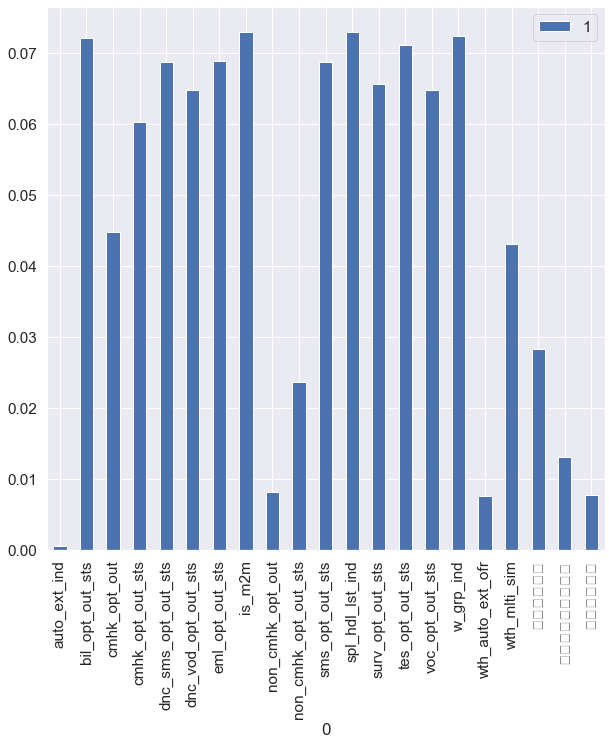

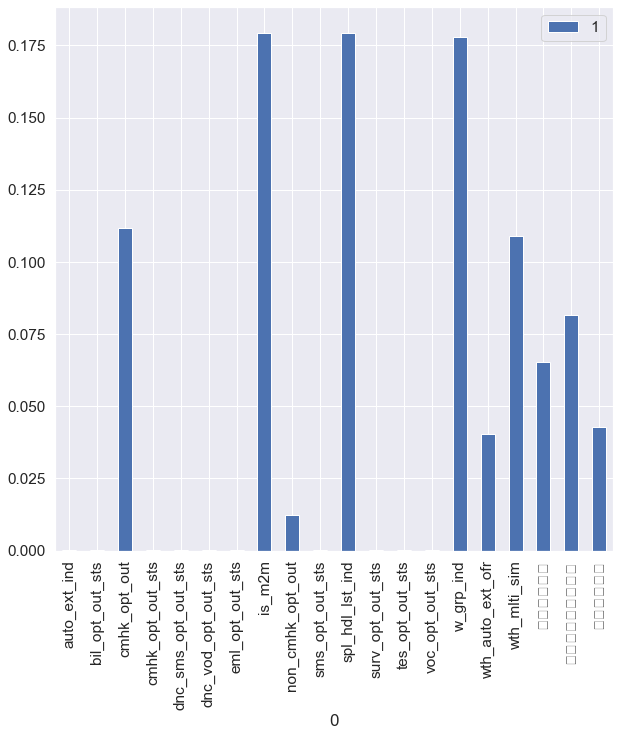

In [75]:
plt.rcParams["figure.figsize"] = [10, 10]
(N_0_df[N_0_df[1]!=0]/N_0_Tot).plot.bar(), (Y_0_df[Y_0_df[1]!=0]/Y_0_Tot).plot.bar()

<AxesSubplot: xlabel='0'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25658 (\N{CJK UNIFIED IDEOGRAPH-643A}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20837 (\N{CJK UNIFIE

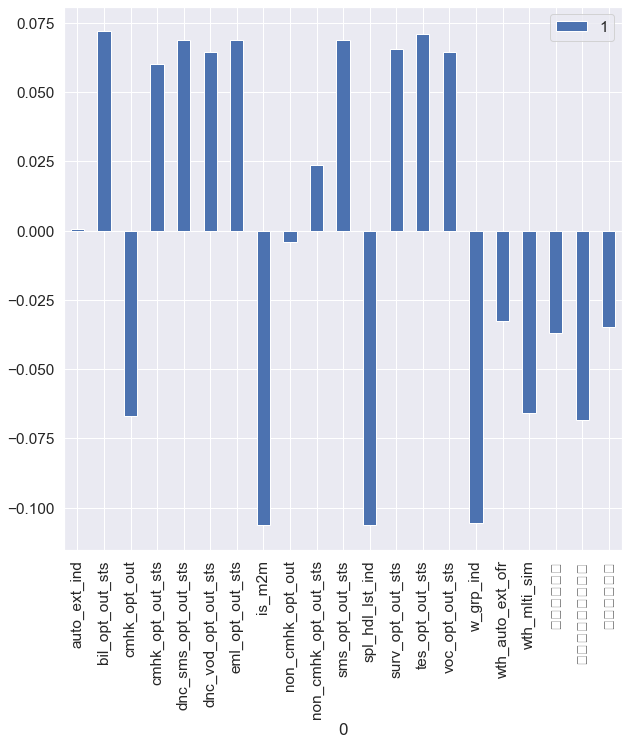

In [76]:
t=N_0_df/N_0_Tot-Y_0_df/Y_0_Tot
plt.rcParams["figure.figsize"] = [10, 10]
(t[t[1]!=0]).plot.bar()

In [77]:
dec_mtx=t[t[1]!=0].sort_values(by=1).to_numpy()
dec_mtx=dec_mtx.reshape(1,dec_mtx.shape[0])[0]

In [78]:
dec_mtx

array([-0.10647267, -0.10643507, -0.10564712, -0.06831708, -0.06681671,
       -0.06596051, -0.03702286, -0.03484813, -0.03259716, -0.00401511,
        0.00055091,  0.02368491,  0.06026295,  0.0646003 ,  0.0646003 ,
        0.06544066,  0.06863421,  0.06863421,  0.06876975,  0.0710355 ,
        0.07191871])

In [79]:
df_col=t[t[1]!=0].sort_values(by=1).index.tolist()
df_col

['is_m2m',
 'spl_hdl_lst_ind',
 'w_grp_ind',
 '是否第一张合约届满',
 'cmhk_opt_out',
 'wth_mlti_sim',
 '是否携号入网',
 '是否自动续约',
 'wth_auto_ext_ofr',
 'non_cmhk_opt_out',
 'auto_ext_ind',
 'non_cmhk_opt_out_sts',
 'cmhk_opt_out_sts',
 'voc_opt_out_sts',
 'dnc_vod_opt_out_sts',
 'surv_opt_out_sts',
 'dnc_sms_opt_out_sts',
 'sms_opt_out_sts',
 'eml_opt_out_sts',
 'tes_opt_out_sts',
 'bil_opt_out_sts']

In [80]:
# (pd.DataFrame(df_col,columns=['Features']).join(pd.DataFrame(dec_mtx,columns=['value']))).to_csv('featureMTXvalue.csv', encoding='utf-8-sig',index=False)

In [81]:
_0_count_test=[]
# tt=test.drop(['离网日期'],axis=1)
tt=test
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [82]:
test_array=np.array(_0_count_test)

In [83]:
y_pred=[]
tor=[]
for x in test_array:
    churn=dec_mtx.dot(x)
    tor.append(churn)
    if churn >=-0.31118400913770394:
        y_pred.append(1)
    else:
        y_pred.append(-1)
y_pred=np.array(y_pred)

In [84]:
outcome=pd.DataFrame(tor,columns=['outcome'])

<ipython-input-85-9aa97c6f2a0a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(outcome['outcome'], hist=True, kde=False,


Text(0, 0.5, 'cumulative')

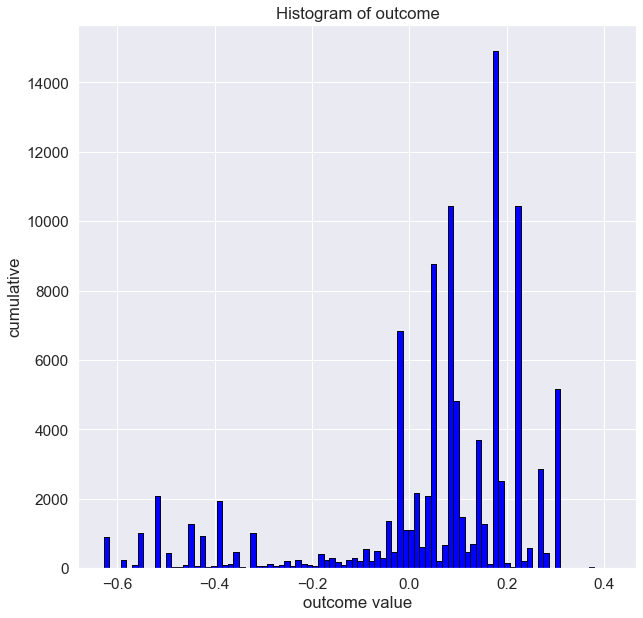

In [85]:
# matplotlib histogram
plt.hist(outcome['outcome'], color = 'blue', edgecolor = 'black',
         bins = int(180/2))

# seaborn histogram
sn.distplot(outcome['outcome'], hist=True, kde=False, 
             bins=int(180/2), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of outcome')
plt.xlabel('outcome value')
plt.ylabel('cumulative')

In [86]:
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [87]:
val=y_pred-y_test['是否离网'].to_numpy()
len(np.nonzero(val)[0])

1256

In [88]:
sum(y_test['是否离网'].to_numpy()==-1)

9826

In [89]:
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

98.76482504966269

In [90]:
conf_list=[0,0,0,0]
for i in range(len(y_pred)):
    if y_test['是否离网'].to_numpy()[i]==-1:
        if val[i]==0:
            conf_list[0]+=1
        else:
            conf_list[1]+=1
    else:
        if val[i]==0:
            conf_list[3]+=1
        else:
            conf_list[2]+=1
np.set_printoptions(suppress=True)
conf_mrtx=np.array(conf_list)

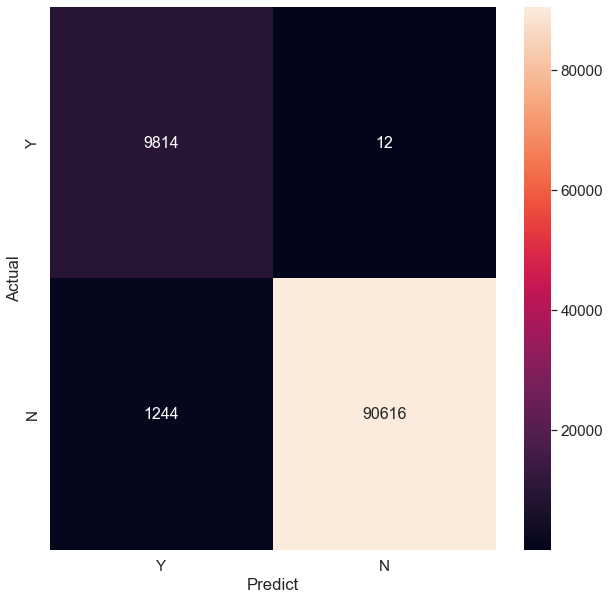

In [91]:
df_cm = pd.DataFrame(conf_mrtx.reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
plt.xlabel('Predict')
plt.ylabel('Actual')
sn.set(font_scale=1.4) # for label size


plt.show()

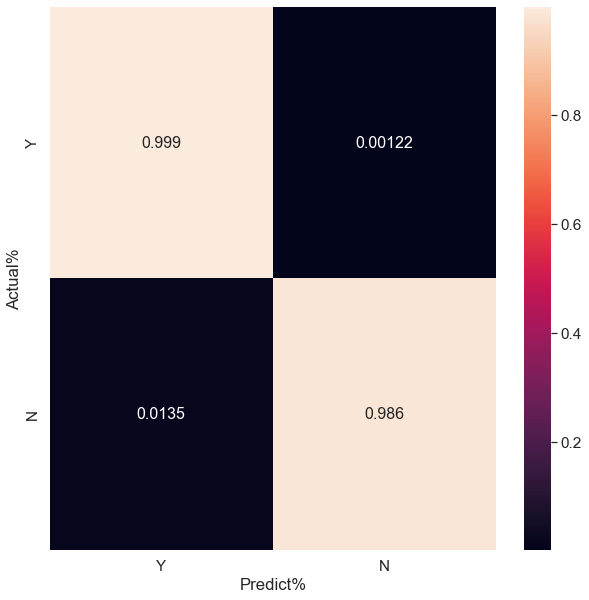

In [92]:
conf_prec=[conf_list[0]/sum(conf_list[0:2]),conf_list[1]/sum(conf_list[0:2]),conf_list[2]/sum(conf_list[2:]),conf_list[3]/sum(conf_list[2:])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size